In [186]:
%load_ext autoreload
%autoreload 2

from msr.signals.ppg import PPGSignal
from msr.signals.ecg import ECGSignal
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Loading data and creating Signals objects**

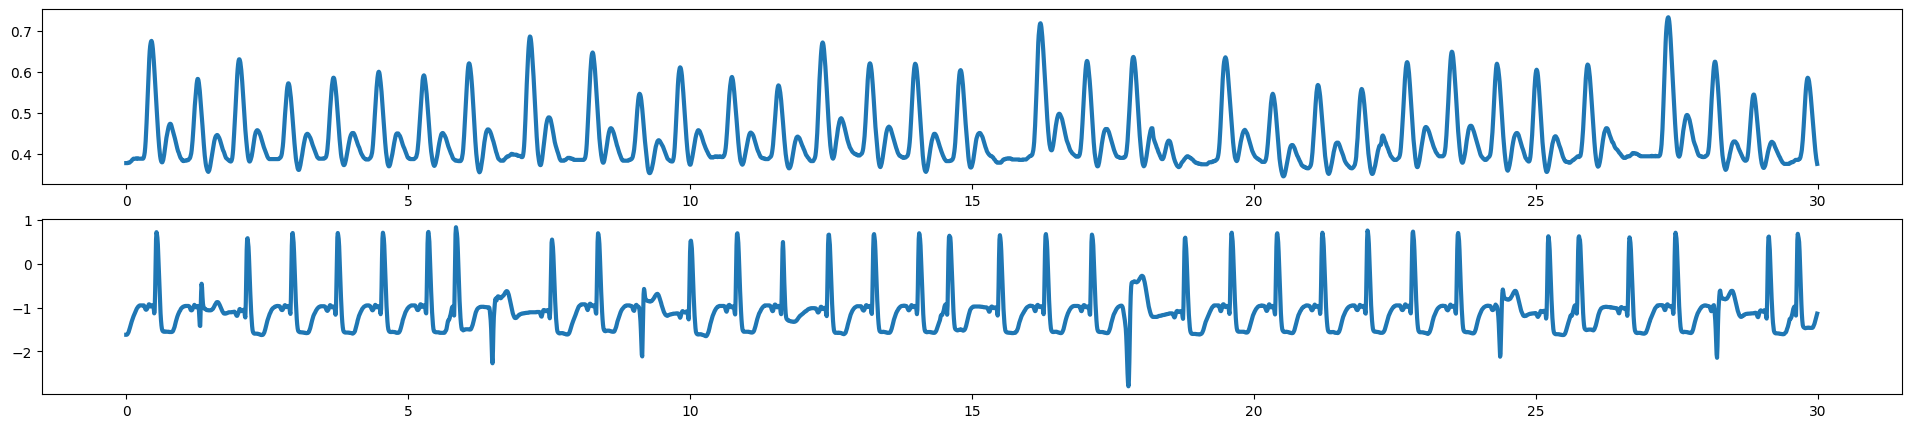

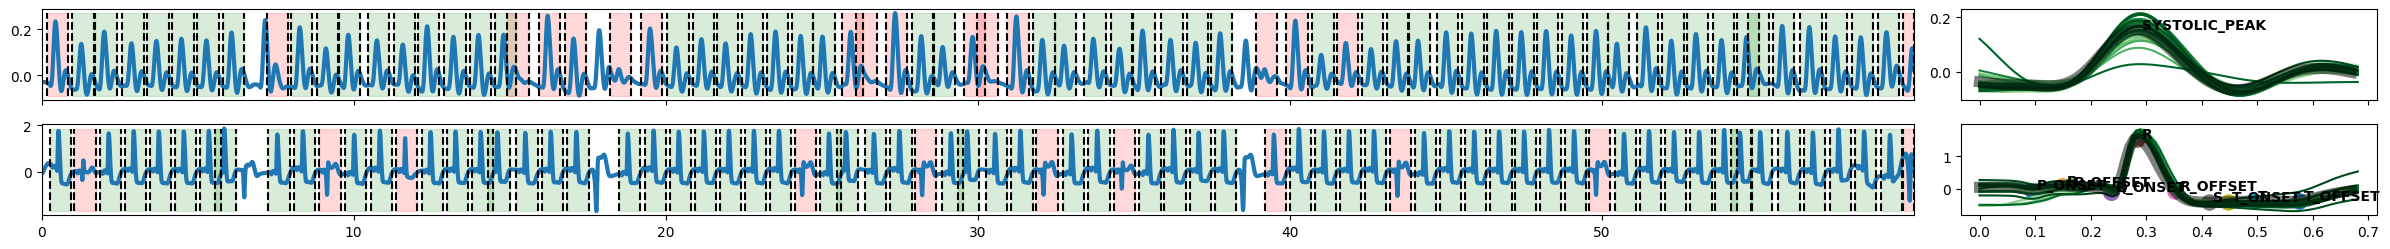

In [386]:
data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[0]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

{'pulse_width_10%': 0.6458368258064509,
 'pulse_width_25%': 0.28300714838709645,
 'pulse_width_33%': 0.24672418064516102,
 'pulse_width_50%': 0.19592802580645138,
 'pulse_width_66%': 0.15238846451612886,
 'pulse_width_75%': 0.1306186838709676}

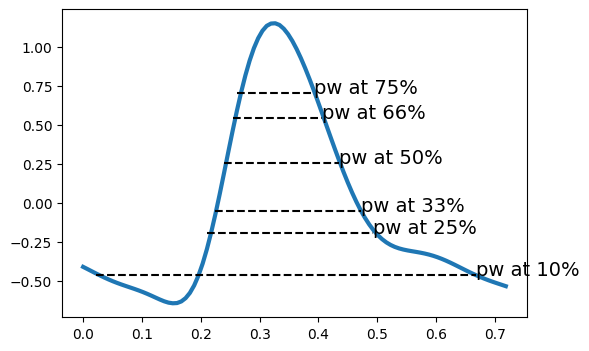

In [421]:
beat.extract_pulse_width_features(plot=True)

{'pulse_height_10%': 0.1108253622485057,
 'pulse_height_25%': 0.06640062016415493,
 'pulse_height_33%': 0.8354486538973903,
 'pulse_height_50%': 1.6322163807683592,
 'pulse_height_66%': 0.5489002344867373,
 'pulse_height_75%': 0.3449037205567524}

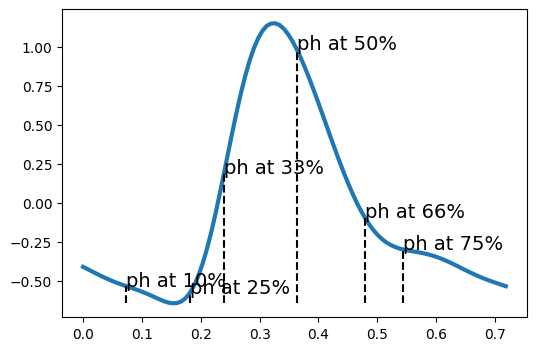

In [423]:
beat.extract_pulse_height_features(plot=True)